In [3]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show 
import matplotlib.image as mpimg 
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.widgets import TextBox

In [1]:
import torch

# Retrieve pickle and csv data

In [203]:
matrix_root=pd.read_csv('/Volumes/Extreme_SSD/Projectome_Estimation/evaluation_data/matrix_roots_df.csv', index_col="root_name")
matrix_muscle=pd.read_csv('/Volumes/Extreme_SSD/Projectome_Estimation/evaluation_data/matrix_muscle_df.csv',index_col="muscle_name")
# set the same columns ( Elecs are E00, E01 etc instead of 0, 1,2)
matrix_muscle.columns=matrix_root.columns
#usecols=np.arange(0, 16)


In [204]:
matrix_muscle.head()

,E00,E01,E02,E03,E04,E05,E06,E07,E08,E09,E10,E11,E12,E13,E14,E15
muscle_name,,,,,,,,,,,,,,,,
LIL,0.609685,0.322656,0.009657,0.015873,0.272748,0.497428,0.591614,0.054155,0.008912,0.006803,0.006793,0.033635,0.012921,0.011674,0.182483,1.000000
RIL,0.064534,0.297731,0.018213,0.013978,0.021272,0.054375,0.061937,0.038113,0.015738,0.393835,0.225270,0.809293,1.000000,0.984585,0.321834,0.087891
LRF,0.330404,0.198652,0.013846,0.013758,0.869653,0.359235,0.244147,0.005030,0.009416,0.003196,0.004162,0.009912,0.006613,0.003183,0.628978,1.000000
RRF,0.004652,0.002978,0.004494,0.003776,0.002827,0.003990,0.004244,0.003661,0.017031,0.245206,0.429289,1.000000,0.160055,0.004751,0.445038,0.087838
LVL,0.009856,0.006134,0.007878,0.007500,0.710368,1.000000,0.008150,0.000710,0.006050,0.000743,0.000691,0.000793,0.000966,0.000838,0.368942,0.937400


# defining heatmap to visualise results

In [ ]:

def get_heatmap_results(result,comparison_method,  save_fig=0):
    """
    A function to create a heatmap.

    Parameters
    ----------
    result
        df, 2D matrix of correlation or matrix multiplication  
    comparison_method
        str, 'correlation' or 'matrix_multiplication'
    save_fig
        int, if set to 1 save figure
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default
    """
            
    fig, ax = plt.subplots(figsize=(20, 10))# creating subplot

    # ## Define which normalisation method is used
    # # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # # data_structure="normalise_max_P2P_div_amp"
    # data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_by_max_response"
    
    ## Define heatmap
    sns.heatmap(data=result, cmap="Reds", cbar=True,
    annot=True,  yticklabels=result.index,
    xticklabels=result.columns,
    cbar_kws={'label': comparison_method},
    fmt='.2g' )
 
    ## Define ticks
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

    ## Define labels
    ax.set_title('Heat map to compare muscle and root ..?', size=18, fontstyle='italic', pad=20)
    ax.set_ylabel('Muscles',  size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold") 
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Roots', size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold")

    
    # ## Define Textbox
    # print(f"Heat map is being created with Normalisation method: {data_structure}")
    # axbox = fig.add_axes([0, 1.0, 0.2, 0.05]) #[left, bottom, width, height]
    # text_box = TextBox(axbox,label=None, textalignment="center")
    # text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

    ## Save plots   
    if save_fig:
        folder_name= "heatmap/muscles"
        data_file = "Heat_map_all_muscles_"+ data_structure+'.png'
        save_figure(folder_name, data_file)

    plt.show()

    

# Correlation

1. ExM and ExR
2. build a matrix correlation_matrix= MxR
3. For every combination save the correlation (of the two columns) in the correlation_matrix



correlation fucntions:

1. calculates the mean of both columns
2. sample deviation
3. standardize, multiply and take the sum

In [194]:

## Get matrix ExM, and ExR
matrix_muscle_transposed=matrix_muscle.transpose()
matrix_root_transposed=matrix_root.transpose()
## cobine muscles and roots by axis of electrodes
combined_matrix=pd.concat([matrix_muscle_transposed, matrix_root_transposed], axis=1)
## compute correlation
correlation_matrix=combined_matrix.corr()
## drop unnecessary columns and rows
correlation_matrix=correlation_matrix.drop(matrix_root_transposed.columns, axis=0)
correlation_matrix=correlation_matrix.drop(matrix_muscle_transposed.columns, axis=1)
correlation_matrix.head()

,T12_DL,T12_DR,L1_DL,L1_DR,L2_DL,L2_DR,L3_DL,L3_DR,L4_DL,L4_DR,L5_DL,L5_DR,S1_DL,S1_DR,S2_DL,S2_DR,S3_DL,S3_DR,S4_DL,S4_DR
LIL,0.431576,-0.232791,0.246261,0.109463,0.425061,-0.135296,0.265099,0.087869,-0.081353,-0.274525,-0.390190,-0.525587,-0.394360,-0.387264,-0.464528,-0.490113,-0.452466,-0.475455,-0.456775,-0.456938
RIL,-0.422915,0.640105,-0.510473,0.537868,-0.344810,0.420826,-0.414050,0.345746,-0.356199,-0.023594,-0.404495,-0.285752,-0.386288,-0.323329,-0.376516,-0.357027,-0.373163,-0.352354,-0.364679,-0.353978
LRF,0.291589,-0.418694,0.220713,-0.196452,0.333632,-0.610325,0.420518,-0.312231,0.284272,-0.249780,0.049567,-0.176233,-0.000129,-0.014941,-0.156764,-0.173497,-0.116647,-0.170200,-0.111965,-0.115424
RRF,-0.465140,0.085595,-0.703950,0.097405,-0.579936,0.092656,-0.356259,0.474951,0.117455,0.524946,0.010393,0.200394,0.068716,0.141568,-0.029892,0.044366,0.048094,0.037163,0.068253,0.086602
LVL,0.281410,-0.474274,0.208678,-0.402218,0.284505,-0.597641,0.523762,-0.194634,0.467625,-0.004361,0.156170,-0.063650,0.109793,0.124013,-0.038655,-0.052094,0.009140,-0.040093,0.014510,0.006100


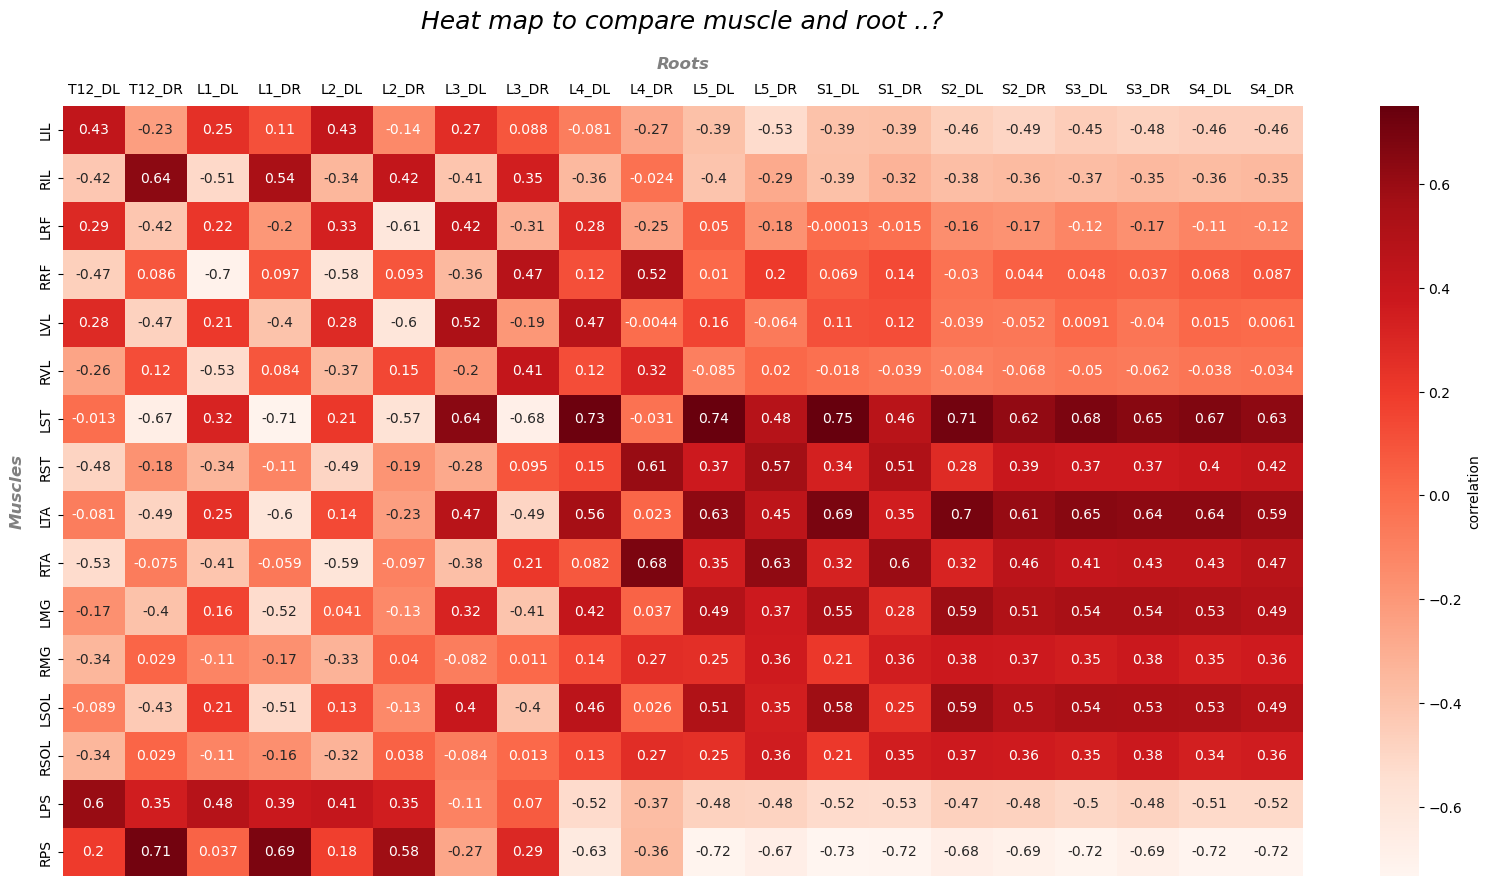

In [223]:
get_heatmap_results(correlation_matrix,'correlation')

# matrix multiplication

matrix muscle (MxE) X Matrix root (RxE)

1. Transpose root matrix to ExR
2. matrix multiplication, df.dot(other)
3. ??

In [212]:
## transpose root matrix to ExR
matrix_root_transposed=matrix_root.transpose()
## mulitpy matrices and get MxR
multiplication_matrix=matrix_muscle.dot(matrix_root_transposed)
multiplication_matrix.head()

root_name,T12_DL,T12_DR,L1_DL,L1_DR,L2_DL,L2_DR,L3_DL,L3_DR,L4_DL,L4_DR,L5_DL,L5_DR,S1_DL,S1_DR,S2_DL,S2_DR,S3_DL,S3_DR,S4_DL,S4_DR
muscle_name,,,,,,,,,,,,,,,,,,,,
LIL,2.387365,1.190652,2.611443,2.214158,3.065759,2.501866,2.731018,2.921206,2.303058,2.532762,1.743398,2.001075,1.999600,2.174406,1.024699,0.586597,1.750862,0.941909,1.837286,1.883486
RIL,1.250761,3.146920,1.801719,3.316015,2.636419,3.804766,2.657045,3.733893,2.467760,3.281386,2.117603,2.724114,2.450633,2.718181,1.432656,1.057836,2.256270,1.421448,2.371737,2.447326
LRF,2.235407,0.841774,2.643745,1.832130,3.040418,1.915925,2.934428,2.689077,2.749135,2.580473,2.303238,2.369399,2.394393,2.542396,1.496282,1.191236,2.166691,1.454214,2.247959,2.304214
RRF,0.441604,1.178293,0.512462,1.492714,1.087755,1.870288,1.410867,2.186484,1.697296,2.139827,1.475574,1.849927,1.621716,1.783938,1.107410,1.096175,1.564353,1.210848,1.627387,1.691613
LVL,1.967134,0.390325,2.265139,1.131333,2.562577,1.401235,2.629720,2.262820,2.586667,2.292406,2.074730,2.046299,2.102300,2.248533,1.385719,1.171649,1.931499,1.383822,1.995189,2.038594


Show results in a heatmap

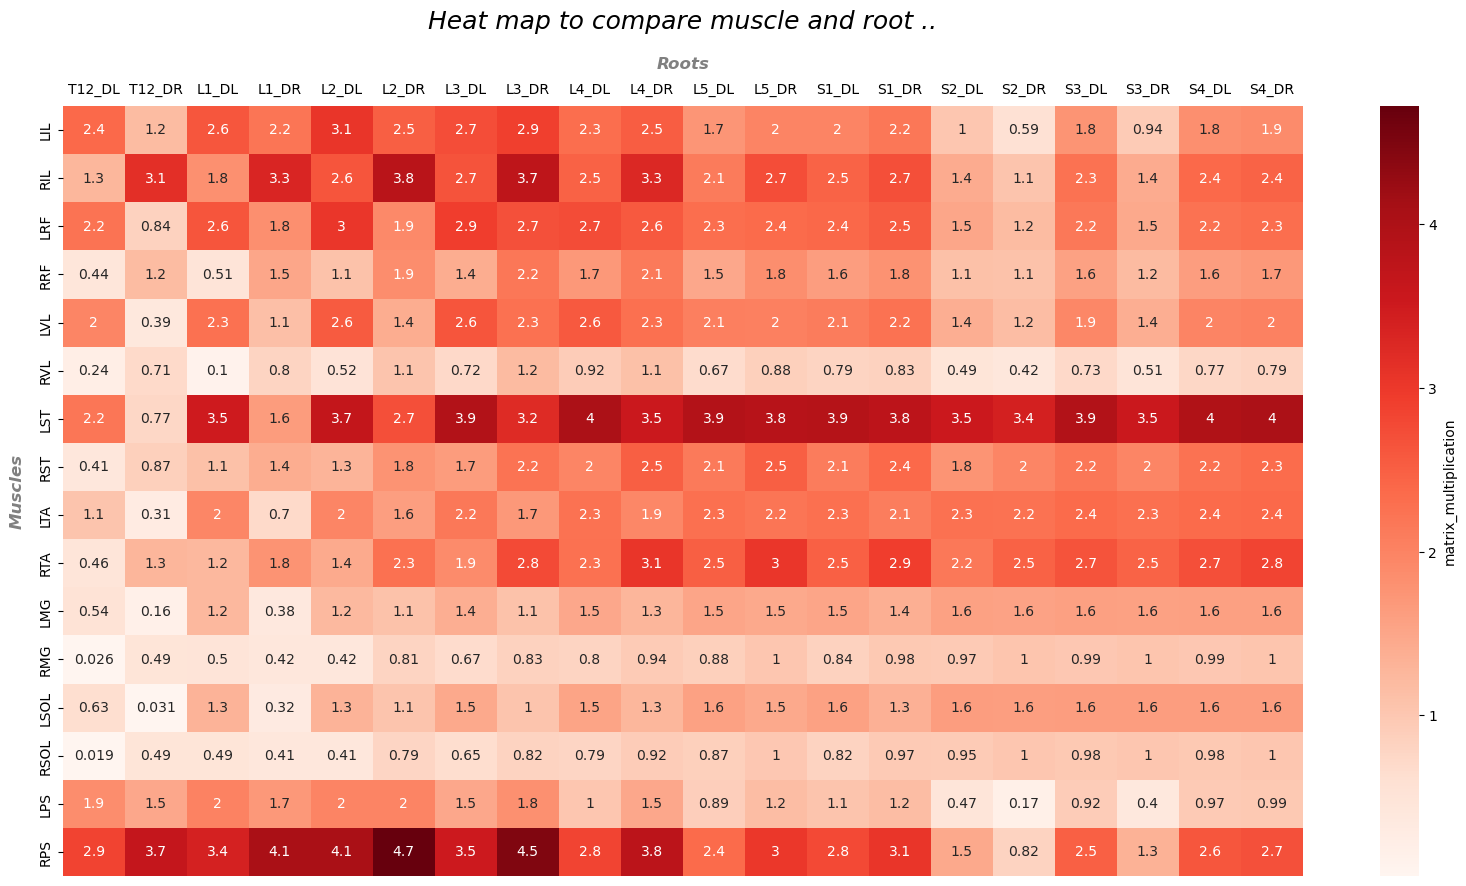

In [221]:
get_heatmap_results(multiplication_matrix,'matrix_multiplication')

In [222]:

def get_heatmap_results(result,comparison_method,  save_fig=0):
    """
    A function to create a heatmap.

    Parameters
    ----------
    result
        df, 2D matrix of correlation or matrix multiplication  
    comparison_method
        str, 'correlation' or 'matrix_multiplication'
    save_fig
        int, if set to 1 save figure
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default
    """
            
    fig, ax = plt.subplots(figsize=(20, 10))# creating subplot

    # ## Define which normalisation method is used
    # # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # # data_structure="normalise_max_P2P_div_amp"
    # data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_by_max_response"
    
    ## Define heatmap
    sns.heatmap(data=result, cmap="Reds", cbar=True,
    annot=True,  yticklabels=result.index,
    xticklabels=result.columns,
    cbar_kws={'label': comparison_method},
    fmt='.2g' )
 
    ## Define ticks
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

    ## Define labels
    ax.set_title('Heat map to compare muscle and root ..?', size=18, fontstyle='italic', pad=20)
    ax.set_ylabel('Muscles',  size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold") 
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Roots', size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold")

    
    # ## Define Textbox
    # print(f"Heat map is being created with Normalisation method: {data_structure}")
    # axbox = fig.add_axes([0, 1.0, 0.2, 0.05]) #[left, bottom, width, height]
    # text_box = TextBox(axbox,label=None, textalignment="center")
    # text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

    ## Save plots   
    if save_fig:
        folder_name= "heatmap/muscles"
        data_file = "Heat_map_all_muscles_"+ data_structure+'.png'
        save_figure(folder_name, data_file)

    plt.show()

    